# Kernel SVM Classification

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [8]:
print(f'{df.head()}')
print('---------------------------------------------------')
print(f'{df.describe()}')
print('---------------------------------------------------')
print(f'{df.info()}')
print('---------------------------------------------------')
print(f'{df.columns}')

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
---------------------------------------------------
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
---------------------------------------------------
<class 'pandas.core.frame.Dat

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

### Feature Scaling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Fitting Kernel SVM Classification to the Training set

In [23]:
classifier = SVC(kernel='poly', random_state=0, degree=7)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=7, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### Predicting the Test set results

In [24]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

### Making the Confusion Matrix

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [13, 19]])

In [26]:
accuracy = (cm[0][0]+cm[1][1])/(cm.sum())
print(f'Accuracy = {accuracy*100}%')

Accuracy = 84.0%


### Visualising the Training set results

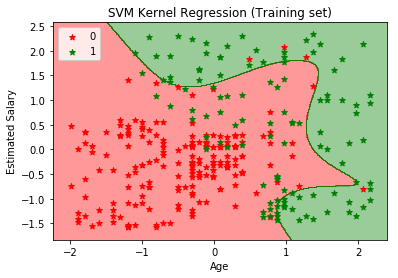

In [27]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.4, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g'][i], marker='*', label=j)

plt.title('SVM Kernel Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

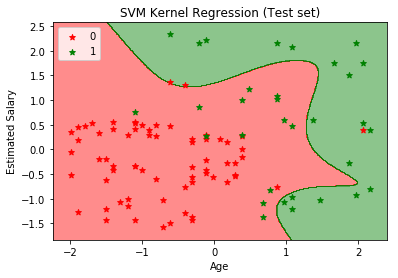

In [28]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.45, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g'][i], marker='*', label=j)

plt.title('SVM Kernel Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()